# 1.预处理MNIST的数据集

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical

(train_x,train_y),(test_x,test_y) = mnist.load_data()
X_train,X_test = tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32) # 归一化
y_train,y_test = to_categorical(train_y),to_categorical(test_y) # 映射为one-hot形式
print(X_train[:5])
print(y_train[:5])

2024-05-02 10:28:45.117994: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]], shape=(5, 28, 28), dtype=float32)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [

# 2.搭建MLP模型

In [2]:
from keras import Sequential
from keras.layers import Flatten,Dense
from keras import Input

model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(units=256,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

# 3.模型训练

## 调用model.compile()函数对训练模型进行设置

In [3]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## 调用model.fit()配置训练参数，开始训练，并保存训练结果。

In [4]:
H = model.fit(x=X_train,y=y_train,validation_split=0.2,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8144 - loss: 0.6835 - val_accuracy: 0.9452 - val_loss: 0.1980
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1804 - val_accuracy: 0.9597 - val_loss: 0.1447
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9658 - loss: 0.1203 - val_accuracy: 0.9656 - val_loss: 0.1165
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0895 - val_accuracy: 0.9688 - val_loss: 0.1056
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0656 - val_accuracy: 0.9735 - val_loss: 0.0914
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0518 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0429 - val_accuracy: 0.9753 - val_loss: 0.0834
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0317 - val_accuracy: 0.

# 4.显示模型准确率和误差

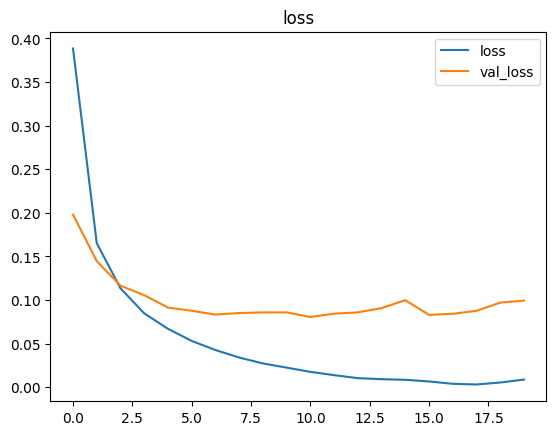

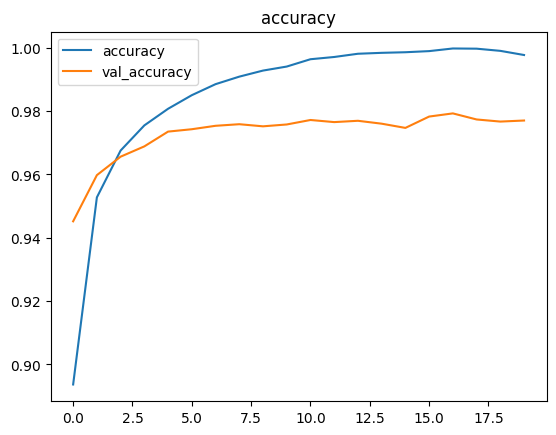

In [15]:
import matplotlib.pyplot as plt
def show_train(history,train,validation):
    plt.plot(history.epoch, history.history[train],label=train)
    plt.plot(history.epoch, history.history[validation],label=validation)
    plt.title(train)
    plt.legend()
    plt.show()
show_train(H,'loss','val_loss')
show_train(H,'accuracy','val_accuracy')

# 5.使用测试数据进行识别

In [6]:
res = model.predict(X_test[:5])
res = tf.argmax(res,axis=1)
print(res)
print(test_y[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
tf.Tensor([7 2 1 0 4], shape=(5,), dtype=int64)
[7 2 1 0 4]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


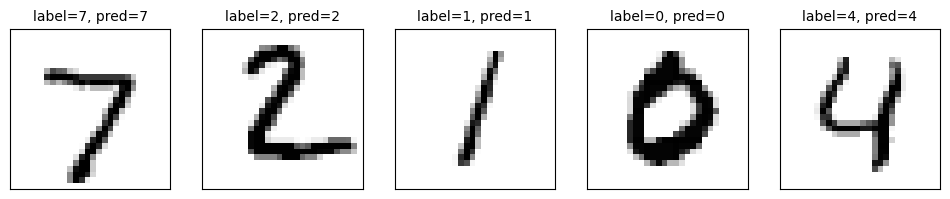

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def pred_plot_images_lables(images,labels,start_idx,num=5):
    # 预测
    res = model.predict(images[start_idx:start_idx+num])
    res = np.argmax(res,axis=1)

    # 画图
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(num):
        ax = plt.subplot(1,num,1+i)
        ax.imshow(images[start_idx+i],cmap='binary')
        title = 'label=' + str(labels[start_idx+i]) + ', pred=' + str(res[i])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
pred_plot_images_lables(X_test,test_y,0,5)